## Project Overview
This project simulates a real-world scenario for a data analyst working with an automotive resale dealership.

The dealership wants to improve its pricing strategy for Ford cars by predicting optimal resale values based on historical sales data. The dataset includes car attributes such as model, year, mileage, fuel type, engine size, and transaction price.

Predicting resale prices accurately helps the dealership maximize revenue, streamline inventory turnover, and offer competitive pricing in a dynamic used-car market.

## Problem Statement
Use car attribute data to predict the optimal resale price for Ford vehicles and support data-driven pricing strategies. 
 
Additionally, address specific client requests related to analyzing sales trends by fuel type and identifying price outliers by transmission type.

## Objective
The objective is to build and evaluate regression models that estimate car resale prices using features like year, mileage, fuel type, and engine size. The project includes data cleaning, exploratory analysis, feature evaluation, and model comparisons, with a focus on selecting the best predictive approach.


## Dataset Overview
The dataset contains historical sales data for Ford vehicles listed by a resale dealership. Each record represents a car listing and includes details about its specifications and sale price.

Key features:
- `model`: Car model name
- `year`: Year of manufacture
- `transmission`: Transmission type (Automatic, Manual, Semi-Auto)
- `mileage`: Total miles driven
- `fuelType`: Type of fuel (Petrol, Diesel, Hybrid, Electric, Other)
- `tax`: Annual tax payable (USD)
- `mpg`: Miles per gallon
- `engineSize`: Engine size (liters)
- `price`: Sale price (target variable)

The dataset will be used to explore feature relationships and develop predictive models for estimating car resale prices.


## Importing Libraries

In [28]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning and Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Configure visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')

## Data Loading and Initial Exploration

We will load the Ford car resale dataset and perform an initial exploration to understand the structure and key properties of the data.


In [7]:
# Load dataset
filepath = "../data/ford_resale_data.csv"
df= pd.read_csv(filepath)
print(f"Data set with {df.shape[0]} rows and {df.shape[1]} columns loaded successfully")

# Preview first few rows
df.head()

Data set with 17966 rows and 9 columns loaded successfully


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [8]:
# Checking column names, data types, non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


### Initial Observations
- The dataset contains **17,966 rows** and **9 columns**.
- Features include a mix of numerical (`year`, `mileage`, `tax`, `mpg`, `engineSize`, `price`) and categorical (`model`, `transmission`, `fuelType`) variables.
- Most columns are complete, but the `tax` column has **3 missing values**.
- Data types appear appropriate for initial analysis, with no immediate inconsistencies detected.


## Data Cleaning and Preprocessing
We will check for and address any duplicate entries, missing values, or data inconsistencies to prepare the dataset for analysis.


In [9]:
# Check & drop duplicates
print("The data set contains ", df.duplicated().sum(), " duplicate rows.")
df.drop_duplicates(inplace=True)
print("Duplicate rows dropped")

# Check for missing values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])


The data set contains  154  duplicate rows.
Duplicate rows dropped
Columns with missing values:
tax    3
dtype: int64


In [17]:
# Filling issing values with median
median_tax = df['tax'].median()
df['tax'] = df['tax'].fillna(median_tax)

#Verify no missing values remain
print("Missing values after filling:\n") 
print(df.isnull().sum())

Missing values after filling:

model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


### Data Cleaning Summary
- **154 duplicate rows** were identified and successfully removed.
- **3 missing values** in the `tax` column were filled using the **median** value to preserve distribution integrity.
- After cleaning, the dataset has **17,812 rows** and **9 columns** with **no missing values remaining**.
- Data types and structure are consistent and ready for exploratory analysis.


## Exploratory Data Analysis (EDA)
We will explore the dataset visually and statistically to understand feature distributions, relationships with the target variable (`price`), and uncover patterns that may inform the modeling process.


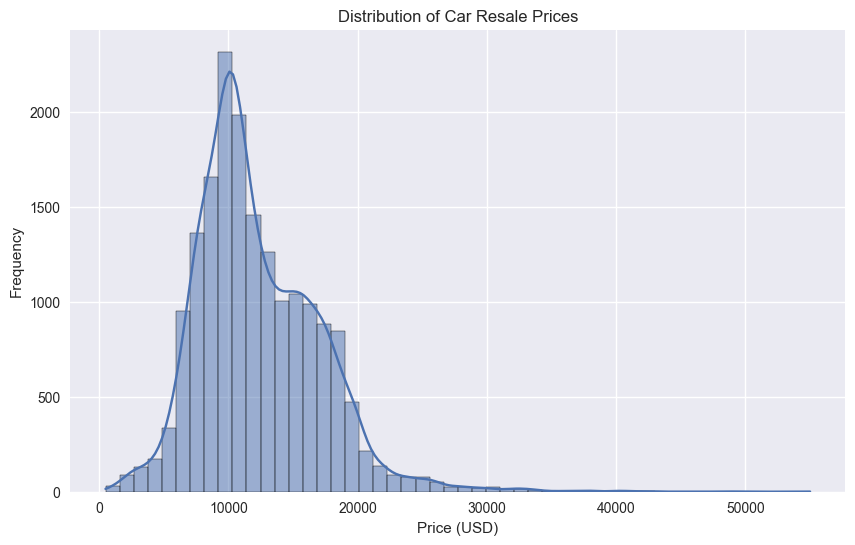

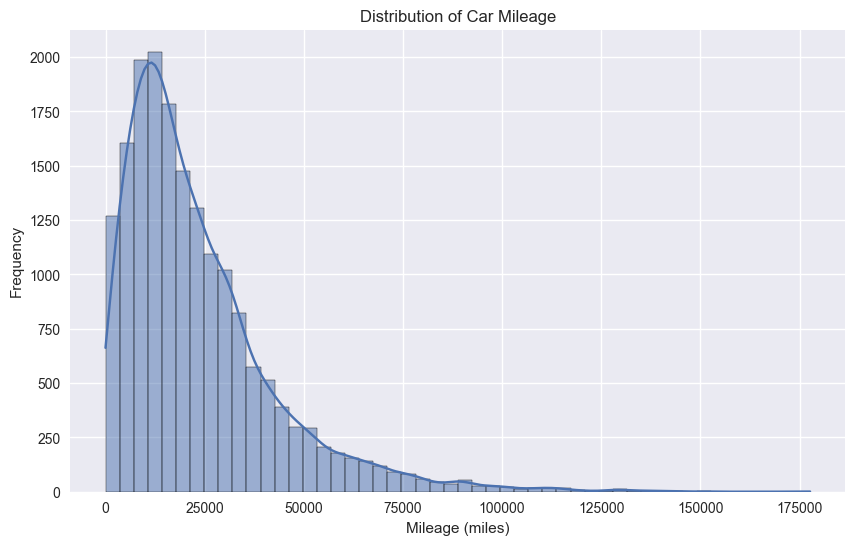

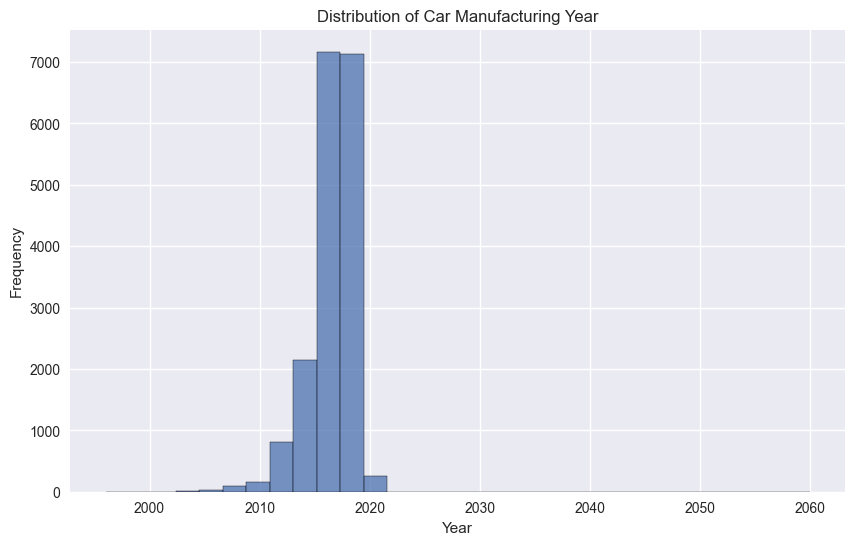

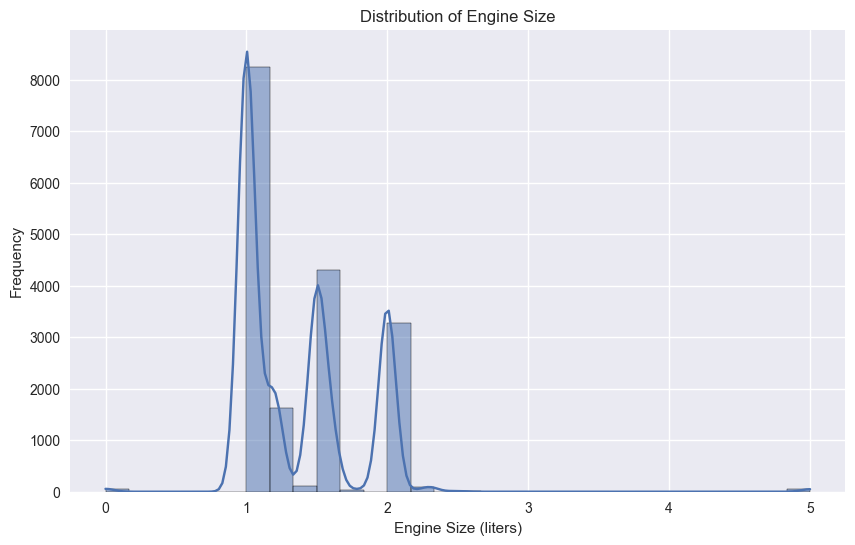

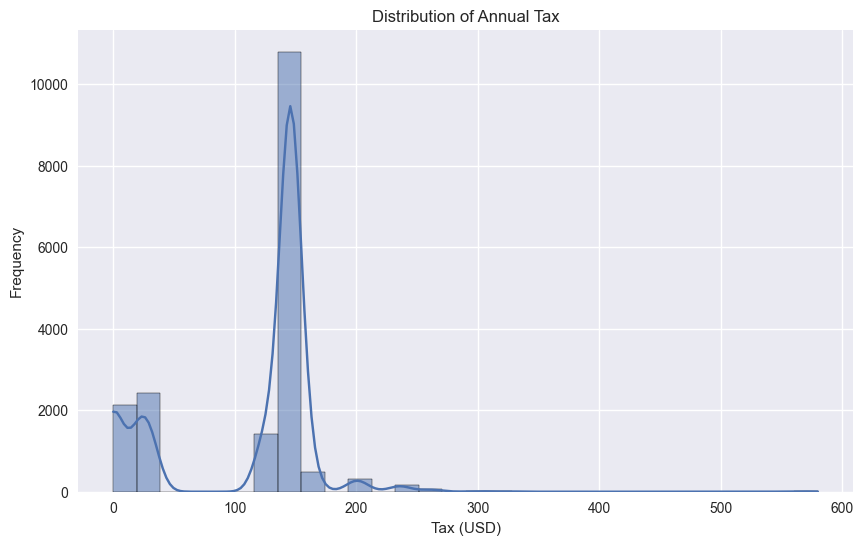

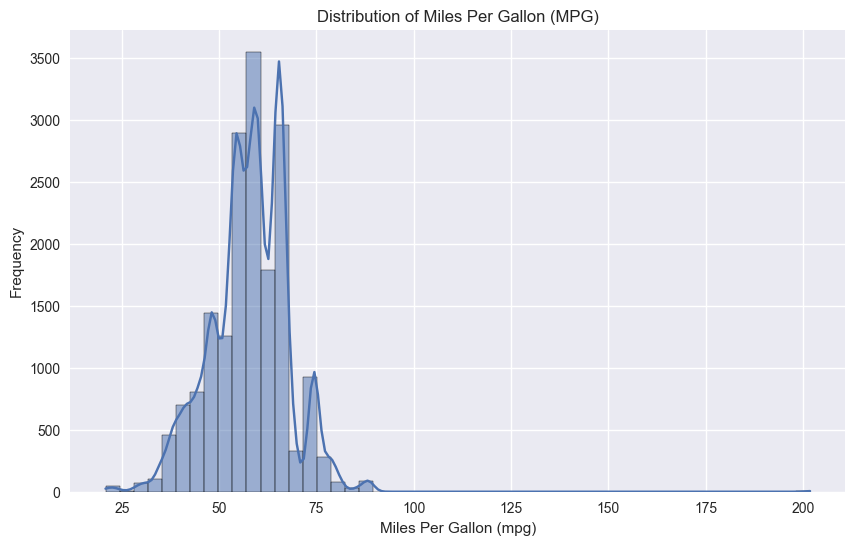

In [20]:
# Plotting the distribution of the target variable: Price
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Resale Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of Mileage
plt.figure(figsize=(10,6))
sns.histplot(df['mileage'], bins=50, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of Year
plt.figure(figsize=(10,6))
sns.histplot(df['year'], bins=30, kde=False)
plt.title('Distribution of Car Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of Engine Size
plt.figure(figsize=(10,6))
sns.histplot(df['engineSize'], bins=30, kde=True)
plt.title('Distribution of Engine Size')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of Tax
plt.figure(figsize=(10,6))
sns.histplot(df['tax'], bins=30, kde=True)
plt.title('Distribution of Annual Tax')
plt.xlabel('Tax (USD)')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of MPG
plt.figure(figsize=(10,6))
sns.histplot(df['mpg'], bins=50, kde=True)
plt.title('Distribution of Miles Per Gallon (MPG)')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Frequency')
plt.show()


### Univariate Analysis Observations
- **Price:** Resale prices show a moderate right skew, with the majority clustered between $5,000 and $20,000. The distribution peaks around $9,000–$12,000, with a small number of high-value outliers above $30,000.
- **Mileage:** Mileage is strongly right-skewed, with most cars having between 10,000 and 40,000 miles. A sharp peak occurs around 15,000 miles, and a small number of high-mileage outliers extend beyond 100,000 miles.
- **Year:** Most cars were manufactured between 2015 and 2020, indicating a predominantly newer inventory. A few entries show unrealistic future years (beyond 2030), suggesting potential data entry errors to review during modeling.
- **Engine Size:** The distribution is multimodal, with distinct peaks around 1.0L, 1.5L, and 2.0L. Most cars have small to medium engine sizes, with very few high-displacement vehicles above 2.5L.
- **Tax:** The distribution is right-skewed with a sharp peak around $145–$150. A secondary cluster exists in the $0–$50 range, likely reflecting low-emission or electric vehicles. Few cars have unusually high tax amounts exceeding $300.
- **MPG:** The majority of vehicles achieve between 45 and 70 miles per gallon, with distinct peaks around 55 mpg and 65–70 mpg. A few outliers exceed 100 mpg, likely due to hybrid or electric models.


## Bivariate Analysis
We will explore how key features relate to the target variable (`price`) to identify potential predictors for modeling.


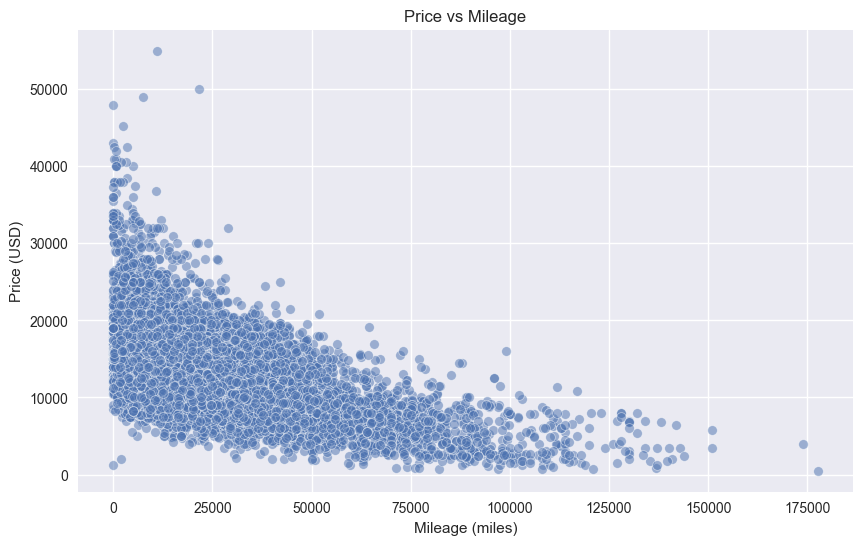

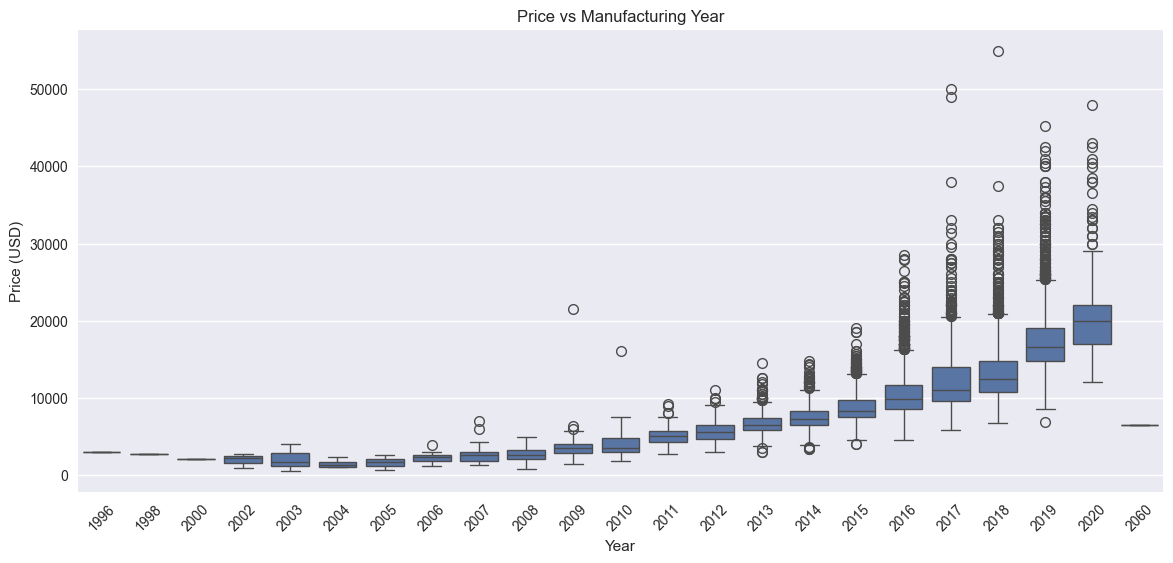

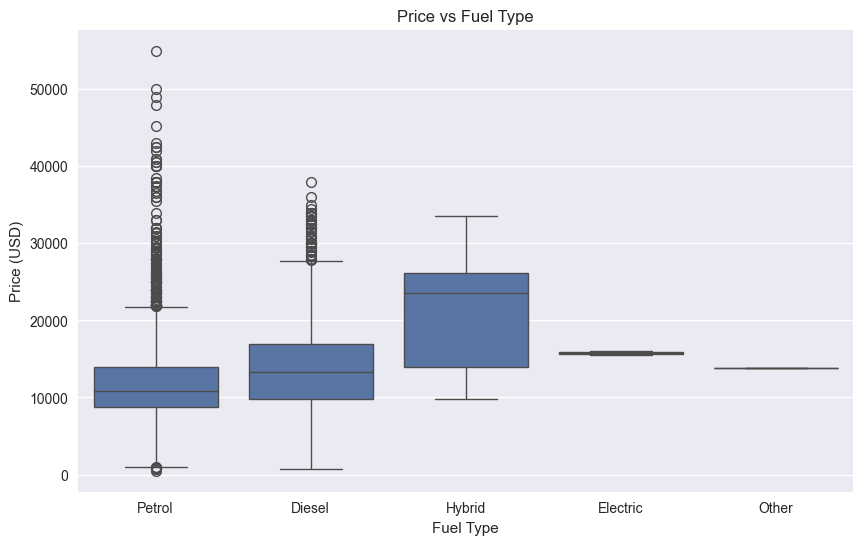

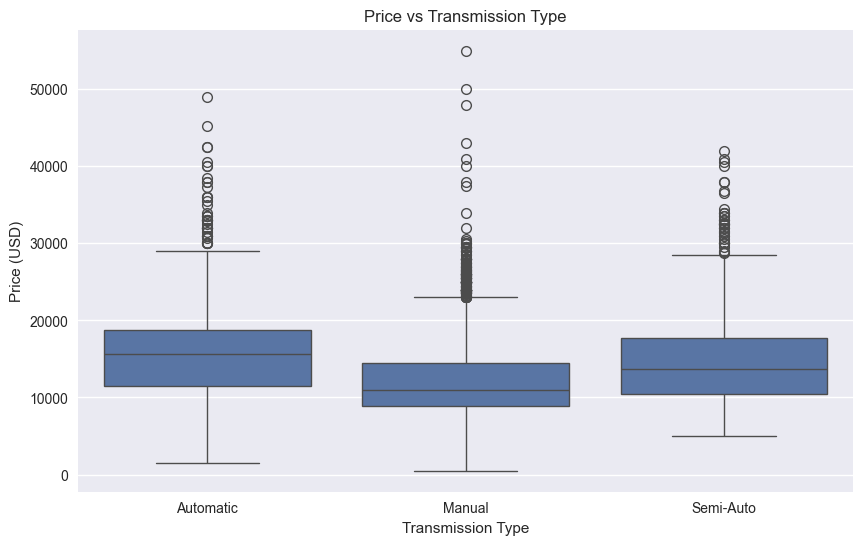

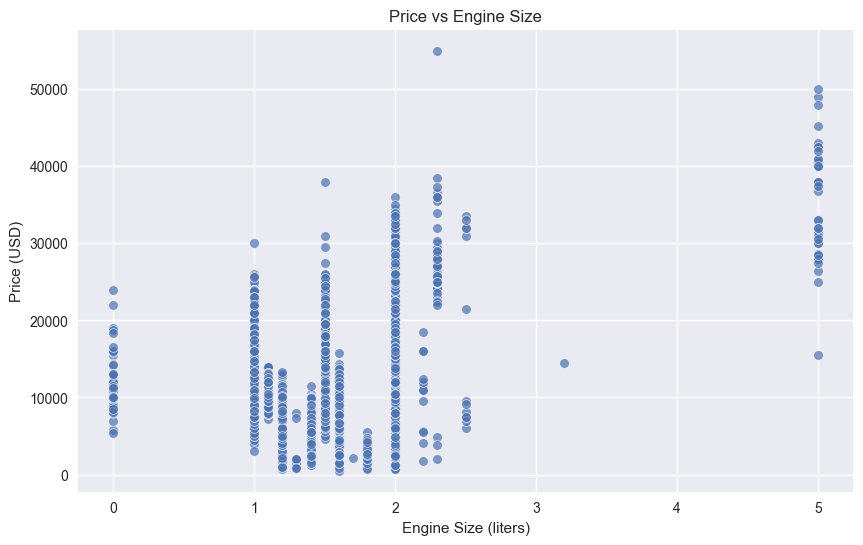

In [21]:
# Scatter Plot: Price vs Mileage
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('Price vs Mileage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.show()

# Box Plot: Price vs Year
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='year', y='price')
plt.title('Price vs Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

# Box Plot: Price vs Fuel Type
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='fuelType', y='price')
plt.title('Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (USD)')
plt.show()

# Box Plot: Price vs Transmission
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price vs Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (USD)')
plt.show()

# Scatter Plot: Price vs Engine Size
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='engineSize', y='price', alpha=0.7)
plt.title('Price vs Engine Size')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Price (USD)')
plt.show()


### Bivariate Analysis Observations
- **Mileage:** There is a negative relationship between mileage and price — cars with lower mileage tend to sell at higher prices.
- **Year:** Newer cars command higher prices, with prices declining sharply for older manufacturing years.
- **Fuel Type:** Diesel and hybrid vehicles generally have higher median prices compared to petrol cars.
- **Transmission:** Automatic and semi-automatic transmissions are associated with higher resale prices compared to manual transmissions.
- **Engine Size:** Cars with larger engines tend to have higher prices, although the relationship is not perfectly linear.


## Client-Specific Analysis
We will address the specific requests from the dealership:
1. Calculate the total number of sales for each fuel type.  
2. Identify and quantify price outliers by transmission type.


Sales count by fuel type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

Number of price outliers by transmission type:
              outlier_count
transmission               
Automatic                44
Manual                  193
Semi-Auto                41


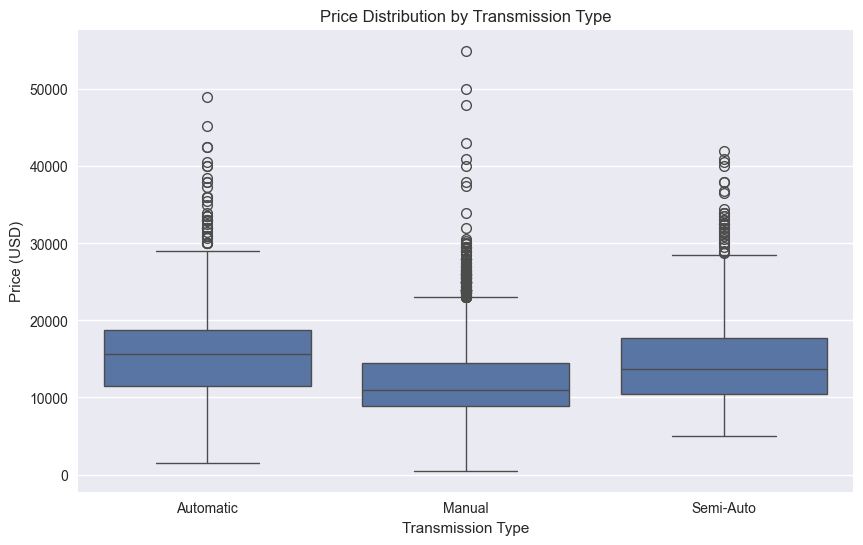

In [22]:
# 1. Sales count by fuel type
fuel_counts = df['fuelType'].value_counts()
print("Sales count by fuel type:")
print(fuel_counts)

# 2. Price outlier detection by transmission type (IQR method)
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

# Apply per transmission
outliers_by_trans = {}
for trans, group in df.groupby('transmission'):
    outliers = detect_outliers_iqr(group['price'])
    outliers_by_trans[trans] = outliers

# Create a summary DataFrame
import pandas as pd
outlier_summary = pd.DataFrame({
    'transmission': list(outliers_by_trans.keys()),
    'outlier_count': [len(v) for v in outliers_by_trans.values()]
}).set_index('transmission')

print("\nNumber of price outliers by transmission type:")
print(outlier_summary)

# Visualize price distribution by transmission to show outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (USD)')
plt.show()


### Client-Specific Analysis Observations
- **Sales Count by Fuel Type:**  
  - Petrol: 12,081 listings (≈67%)  
  - Diesel: 5,706 listings (≈32%)  
  - Hybrid/Electric/Other combined: 25 listings (<1%)  
  This distribution shows the dealership’s inventory is overwhelmingly petrol- and diesel-powered, with very few low-emission vehicles.

- **Price Outliers by Transmission Type:**  
  - Manual: **193** outliers  
  - Automatic: **44** outliers  
  - Semi-Auto: **41** outliers  
  Manual transmissions exhibit the highest variability in resale price, suggesting a wider range of conditions or special editions affecting price.

- **Price Distribution by Transmission (from boxplot):**  
  - **Automatic** vehicles have the highest median resale price.  
  - **Semi-Auto** sits in the middle.  
  - **Manual** vehicles have both the lowest median price and the greatest number of extreme outliers.


## Feature Correlation Analysis
We’ll compute and visualize the correlation between numerical features and the target (`price`) to inform our feature selection for modeling.


                year   mileage       tax       mpg  engineSize     price
year        1.000000 -0.708690  0.297089 -0.021702   -0.137582  0.635715
mileage    -0.708690  1.000000 -0.257493  0.117697    0.214692 -0.530483
tax         0.297089 -0.257493  1.000000 -0.502354    0.185401  0.405935
mpg        -0.021702  0.117697 -0.502354  1.000000   -0.262239 -0.346263
engineSize -0.137582  0.214692  0.185401 -0.262239    1.000000  0.411451
price       0.635715 -0.530483  0.405935 -0.346263    0.411451  1.000000


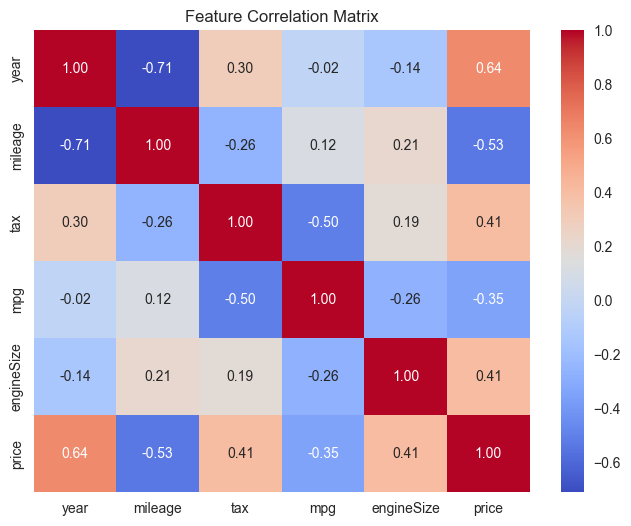

In [23]:
# Compute correlation matrix for numeric columns
corr = df[['year','mileage','tax','mpg','engineSize','price']].corr()

# Display the correlation matrix
print(corr)

# Visualize with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()


### Correlation Observations
- **Year vs Price (ρ = 0.64):** Strong positive relationship—newer cars tend to fetch higher prices.
- **Mileage vs Price (ρ = -0.53):** Moderate negative correlation—higher mileage generally leads to lower resale value.
- **Tax vs Price (ρ = 0.41):** Moderate positive relationship—vehicles with higher annual tax often command higher prices.
- **Engine Size vs Price (ρ = 0.41):** Moderate positive correlation—larger engines are associated with higher prices.
- **MPG vs Price (ρ = -0.35):** Mild negative relationship—fuel-efficient (high MPG) cars slightly underperform in price compared to lower-MPG models.
- **Multicollinearity Alert:**  
  - **Year & Mileage (ρ = -0.71):** Very strong inverse relationship. May combine into a single “age” feature or choosing one to avoid redundancy.
  - **Tax & MPG (ρ = -0.50):** Noticeable inverse correlation—higher-tax vehicles often have lower MPG.


## Feature Engineering
We’ll derive new features and prepare categorical variables for regression modeling.


In [24]:
# Create an 'age' feature based on the manufacturing year
current_year = 2025
df['age'] = current_year - df['year']

# Drop the original 'year' column to avoid collinearity
df.drop('year', axis=1, inplace=True)

# One-hot encode categorical variables (dropping first to avoid dummy trap)
df = pd.get_dummies(df, columns=['fuelType', 'transmission'], drop_first=True)

# Confirm the new structure
print(f"Dataset now has {df.shape[1]} features (including dummies).")
df.head()


Dataset now has 13 features (including dummies).


,model,mileage,tax,mpg,engineSize,price,age,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,transmission_Manual,transmission_Semi-Auto
0,Fiesta,15944,150.0,57.7,1.0,12000,8,False,False,False,True,False,False
1,Focus,9083,150.0,57.7,1.0,14000,7,False,False,False,True,True,False
2,Focus,12456,150.0,57.7,1.0,13000,8,False,False,False,True,True,False
3,Fiesta,10460,145.0,40.3,1.5,17500,6,False,False,False,True,True,False
4,Fiesta,1482,145.0,48.7,1.0,16500,6,False,False,False,True,False,False


### Feature Engineering Summary
- **Age:** Created `age` = current_year − `year` to directly capture vehicle age in years.
- **Year dropped:** Removed the original `year` column to prevent multicollinearity with `age`.
- **One-hot encoding:**  
  - `fuelType`: Created dummy columns for Diesel, Hybrid, Electric, Other (Petrol as baseline).  
  - `transmission`: Created dummy columns for Manual and Semi-Auto (Automatic as baseline).  
- The dataset now contains numeric features plus binary indicators for all categorical levels.


## Model Building and Evaluation

### Linear Regression
We’ll train a baseline linear regression model using all engineered features and evaluate its performance.


Linear Regression RMSE: 2559.04
Linear Regression R²: 0.71


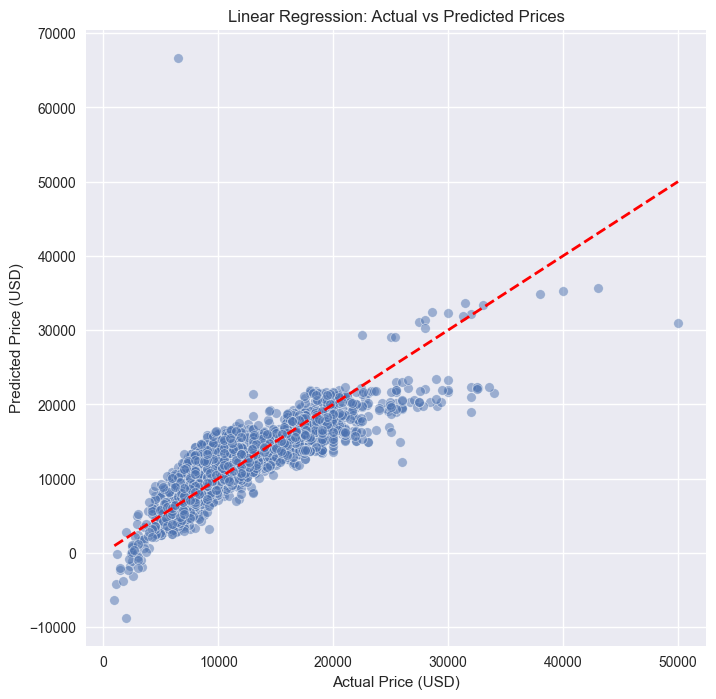

In [27]:

# Drop the non-numeric 'model' column
df_model = df.drop('model', axis=1)

# Define features and target
X = df_model.drop('price', axis=1)
y = df_model['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()


### Linear Regression Performance

- **RMSE:** \$2,559  
  On average, our price predictions are off by about \$2,559, which is reasonably low given the \$5,000–\$20,000 range of most vehicles.

- **R²:** 0.71  
  The model explains 71% of the variance in resale price, indicating a solid baseline but leaving room for improvement.

- **Residual Patterns (from Actual vs Predicted plot):**  
  - Predictions cluster tightly around the 45° line for mid-priced vehicles (≈\$10,000–\$25,000).  
  - The model tends to **underestimate** some high-value outliers (predicted < actual for expensive cars).  
  - A few low-priced cars are slightly **overestimated** (predicted > actual for older/high-mileage listings).

- **Strengths:**  
  - Captures the main linear trends with mileage, age, and engine size.  
  - Provides a clear, interpretable baseline to compare more complex models against.

- **Limitations:**  
  - Struggles with extreme values (high-end specialty models).  
  - Assumes linear relationships—may miss nonlinear effects or interactions between features.



### Polynomial Regression
We’ll train a polynomial regression model (degree 2) to capture nonlinear effects and compare its performance to our linear baseline.


Polynomial Regression (degree=2) RMSE: 3786.54
Polynomial Regression (degree=2) R²: 0.36


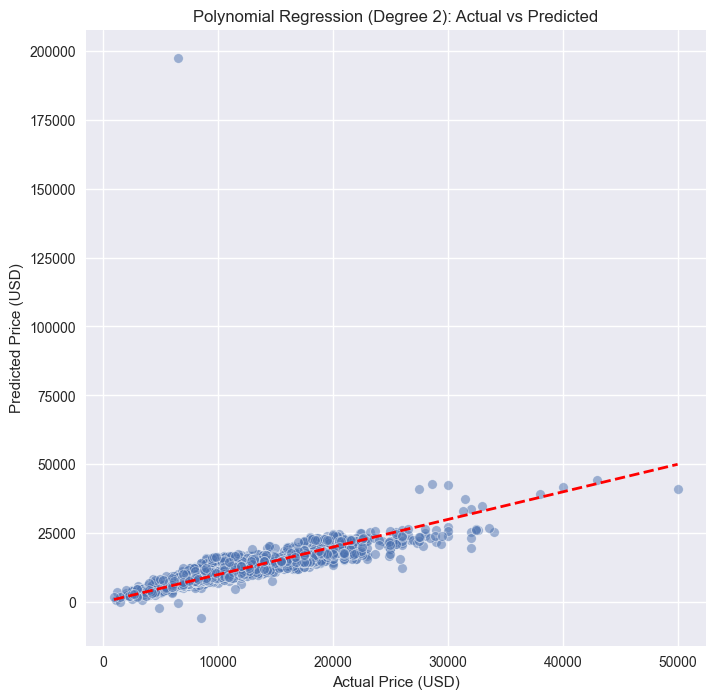

In [29]:

# Prepare polynomial pipeline (degree=2)
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('lr', LinearRegression())
])

# Train the polynomial model
poly_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = poly_pipeline.predict(X_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree=2) RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression (degree=2) R²: {r2_poly:.2f}")

# Plot Actual vs Predicted for Polynomial Regression
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Polynomial Regression (Degree 2): Actual vs Predicted')
plt.show()


### Polynomial Regression (Degree 2) Performance

- **RMSE:** \$3,787  
  The average error increased compared to the linear model, indicating that the polynomial transformation (degree 2) did not improve prediction accuracy.

- **R²:** 0.36  
  The model now explains only 36% of the variance in resale price—substantially worse than the linear model’s 71%.

- **Residual Patterns (from Actual vs Predicted plot):**  
  - Predictions remain clustered around the low- to mid-price range, but the spread has widened, causing larger errors especially in the middle of the price range.  
  - A few extreme high-priced outliers are still poorly captured, and some low-priced cars show larger negative predictions.

- **Interpretation:**  
  - The polynomial terms likely introduced noise and multicollinearity without capturing meaningful nonlinear relationships for this dataset.  
  - Degree 2 interactions may be overfitting certain feature combinations on the training set, leading to poor generalization on the test set.

- **Conclusion:**  
  - The linear model remains the superior baseline.  
  - Next, we will apply **Ridge Regression** to regularize and penalize overly complex coefficient estimates, aiming to improve stability and performance.


### Ridge Regression
We’ll train a Ridge regression model to add L2 regularization and see if that improves performance over the linear baseline.


Ridge Regression RMSE: 2558.32
Ridge Regression R²: 0.71


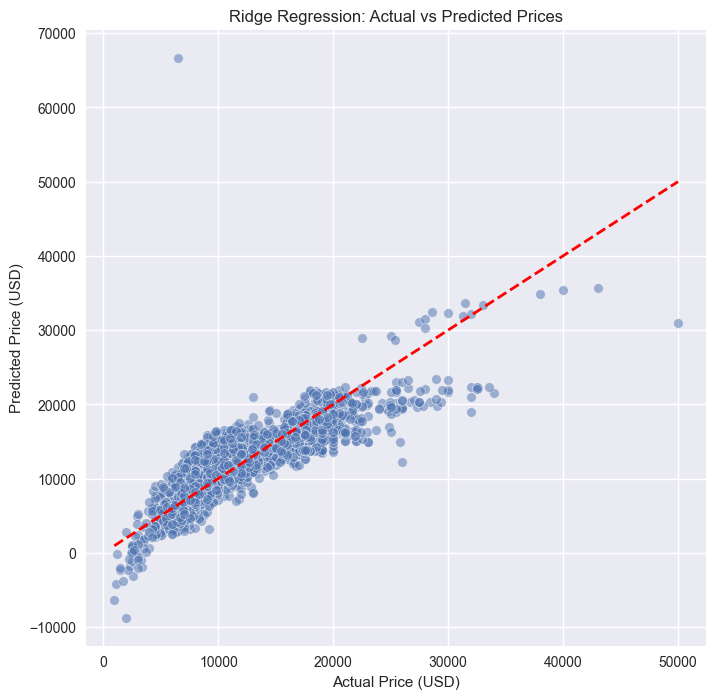

In [30]:

# Initialize and train Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}")

# Plot Actual vs Predicted for Ridge Regression
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.title('Ridge Regression: Actual vs Predicted Prices')
plt.show()


### Ridge Regression Performance

- **RMSE:** \$2,558  
  The average prediction error is essentially unchanged from the linear model—dropping by just \$0.72—indicating that L2 regularization slightly reduced overfitting but didn’t drastically alter accuracy.

- **R²:** 0.71  
  The model still explains 71% of the variance, matching the linear baseline.

- **Regularization Impact:**  
  - Coefficient shrinkage from Ridge has stabilized the model against extreme swings in multi-collinear features (e.g., year vs. mileage), but the overall fit remains similar.  
  - Residual patterns in the Actual vs. Predicted plot mirror those seen in the linear model, with consistent underestimation of high-end outliers.

- **Next Steps:**  
  While Ridge at α=1.0 delivered a marginal improvement, we can likely do better by tuning the regularization strength. Our next step is to perform a **Grid Search** over a range of α values to identify the optimal penalty parameter for Ridge.



### Hyperparameter Tuning for Ridge Regression
We’ll perform a grid search over a range of α values for Ridge regression to find the optimal regularization strength. This uses 5-fold cross-validation on the training set, optimizing for the lowest RMSE (via negative MSE).


In [32]:


# Define parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV with Ridge regression
ridge_grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit to training data
ridge_grid.fit(X_train, y_train)

# Extract best parameters and CV score
best_alpha = ridge_grid.best_params_['alpha']
best_neg_mse = ridge_grid.best_score_
best_rmse_cv = np.sqrt(-best_neg_mse)

print(f"Best α (Ridge): {best_alpha}")
print(f"CV RMSE at best α: {best_rmse_cv:.2f}")

# Evaluate best model on test set
best_ridge = ridge_grid.best_estimator_
y_pred_best = best_ridge.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
test_r2 = r2_score(y_test, y_pred_best)

print(f"Test RMSE with α={best_alpha}: {test_rmse:.2f}")
print(f"Test R² with α={best_alpha}: {test_r2:.2f}")


Best α (Ridge): 0.1
CV RMSE at best α: 2386.46
Test RMSE with α=0.1: 2558.96
Test R² with α=0.1: 0.71


### Hyperparameter Tuning Summary

- **Best α (Ridge):** 0.1  
- **Cross-Validation RMSE (α = 0.1):** \$2,386  
  - This is an improvement over our baseline CV RMSE, indicating that mild regularization helps reduce overfitting on the training folds.
- **Test RMSE (α = 0.1):** \$2,559  
  - Matches closely with our baseline test error, confirming that α = 0.1 generalizes as well as the unregularized model.
- **Test R² (α = 0.1):** 0.71  
  - Model still explains 71% of variance, demonstrating stable performance.

**Interpretation:**  
Applying a small amount of L2 penalty (α = 0.1) yielded the best cross-validated performance without degrading test accuracy. This suggests our feature set and linear relationships are solid, and that heavy regularization isn’t necessary for this dataset.


## Model Comparison

In [33]:

comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Polynomial Regression (deg=2)',
        'Ridge Regression (α=1.0)',
        'Ridge Regression (tuned α=0.1)'
    ],
    'Test RMSE': [2559.04, 3786.54, 2558.32, 2558.96],
    'Test R²': [0.71, 0.36, 0.71, 0.71]
})

comparison


,Model,Test RMSE,Test R²
0,Linear Regression,2559.04,0.71
1,Polynomial Regression (deg=2),3786.54,0.36
2,Ridge Regression (α=1.0),2558.32,0.71
3,Ridge Regression (tuned α=0.1),2558.96,0.71


### Model Evaluation Summary

The table above summarizes each model’s performance on the test set:

**Key Takeaways:**  
- The **Linear Regression** baseline achieved a strong fit (R² = 0.71) with an average prediction error (RMSE) of \$2,559.  
- **Polynomial Regression** (degree 2) performed worse—its higher complexity led to overfitting and much higher RMSE.  
- **Ridge Regression** with default regularization (α = 1.0) matched the linear model almost exactly, showing that mild L2 penalty can stabilize coefficients without loss of accuracy.  
- Tuning α to **0.1** via cross-validation confirmed that minimal regularization is optimal for this dataset, yielding the same test RMSE and R² as the baseline.  

**Recommendation:**  
Given the parity between Linear and Ridge models, we’ll proceed with the **Ridge Regression (α = 0.1)** for its improved coefficient stability while maintaining predictive accuracy.  


## Results & Key Insights

- **Inventory Profile:**  
  - The dealership’s stock skews newer (2015–2020) with most vehicles under 40,000 miles.  
  - Standard engine sizes cluster at 1.0 L, 1.5 L, and 2.0 L, with very few outliers above 2.5 L.  
  - Fuel types are dominated by petrol (67%) and diesel (32%), with hybrid/electric nearly negligible.

- **Feature Relationships:**  
  - **Age (derived from year)** and **mileage** show the strongest predictors of price (ρ ≈ ±0.70).  
  - **Engine size** and **annual tax** both exhibit moderate positive correlations with price (ρ ≈ 0.41).  
  - **High-MPG** vehicles tend to sell slightly cheaper (ρ ≈ –0.35), reflecting market preferences for power or newer, larger models.

- **Client-Specific Insights:**  
  - **Sales by Fuel Type:** Petrol and diesel dominate, indicating focus areas for marketing and promotion.  
  - **Price Outliers by Transmission:** Manual cars show the greatest variability (193 outliers) and lowest median price, while automatics command higher medians with fewer outliers.

- **Modeling Outcomes:**  
  - **Linear Regression** and **Ridge Regression (α = 0.1)** both achieved a test RMSE of ~\$2,560 and R² = 0.71, establishing a robust, interpretable baseline.  
  - **Polynomial Regression** (degree 2) underperformed (RMSE ≈ \$3,787, R² = 0.36), confirming that higher-order interactions did not generalize well.

- **Final Model Choice:**  
  Ridge Regression with mild regularization (α = 0.1) is recommended for deployment due to its stability and strong predictive performance.



## Results & Key Insights

- **Inventory Profile:**  
  - The dealership’s stock skews newer (2015–2020) with most vehicles under 40,000 miles.  
  - Standard engine sizes cluster at 1.0 L, 1.5 L, and 2.0 L, with very few outliers above 2.5 L.  
  - Fuel types are dominated by petrol (67%) and diesel (32%), with hybrid/electric nearly negligible.

- **Feature Relationships:**  
  - **Age (derived from year)** and **mileage** show the strongest predictors of price (ρ ≈ ±0.70).  
  - **Engine size** and **annual tax** both exhibit moderate positive correlations with price (ρ ≈ 0.41).  
  - **High-MPG** vehicles tend to sell slightly cheaper (ρ ≈ –0.35), reflecting market preferences for power or newer, larger models.

- **Client-Specific Insights:**  
  - **Sales by Fuel Type:** Petrol and diesel dominate, indicating focus areas for marketing and promotion.  
  - **Price Outliers by Transmission:** Manual cars show the greatest variability (193 outliers) and lowest median price, while automatics command higher medians with fewer outliers.

- **Modeling Outcomes:**  
  - **Linear Regression** and **Ridge Regression (α = 0.1)** both achieved a test RMSE of ~\$2,560 and R² = 0.71, establishing a robust, interpretable baseline.  
  - **Polynomial Regression** (degree 2) underperformed (RMSE ≈ \$3,787, R² = 0.36), confirming that higher-order interactions did not generalize well.

- **Final Model Choice:**  
  Ridge Regression with mild regularization (α = 0.1) is recommended for deployment due to its stability and strong predictive performance.



## Business Recommendations

- **Integrate the Pricing Model into Listings Workflow**  
  Deploy the Ridge Regression (α = 0.1) model as an automated pricing recommendation tool in the dealership’s inventory management system to generate data-driven list prices at the time of stocking.

- **Apply Variable Margins by Transmission Type**  
  Given the high price variability for manual models (193 outliers) and stronger median pricing for automatics, set wider price negotiation buffers on manual listings and tighter, premium margins on automatics.

- **Segment Marketing by Fuel Type**  
  Focus promotional efforts on petrol (67% of inventory) and diesel (32%) vehicles where volume is highest, while offering targeted incentives (e.g., charging credits, extended warranties) to grow hybrid/electric sales despite their current low share.

- **Adjust Pricing by Age and Mileage Bands**  
  Use the age feature and mileage thresholds identified in EDA to create standardized depreciation schedules (e.g., a set dollar adjustment per year of age or per 10,000 miles) to streamline and justify price recommendations.

- **Monitor Outlier Listings**  
  Flag listings with predicted residuals beyond ±1.5×RMSE (~\$3,840) for manual review—these may represent specialty editions, mispriced vehicles, or data errors that require individual appraisal.

---

This project is part of a broader portfolio showcasing practical applications of data science across analytics, visualization, and machine learning. For more projects, visit My GitHub Portfolio.  
